# 1. Data Sourcing

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 120)
df = pd.read_csv("C:/Users/H437428/Documents/UG/Upgrad Samples/C2. Inferential Statistics/M4. Case Study- Lending Club/loan.csv")
df.head()

C:\Users\H437428\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# 2. Data Cleaning

In [2]:
# Check total number of null values for each column
d_rcheck=df.apply(lambda colEntry:sum(colEntry.isnull()),axis=0)
d_rcheck

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [3]:
# Remove columns which have no values at all i.e., all values are NaN
colsToRemove=[colName for colName,colCount in d_rcheck.items() if colCount>=0.4*df.shape[0]]

# Lets remove the Customer Behaviour variables which are not available at the time of loan application
colsToRemove=colsToRemove+['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','total_acc',
                             'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
                             'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_credit_pull_d',
                             'last_pymnt_amnt', 'pub_rec_bankruptcies']+['id','member_id','url']

d1=df.drop(colsToRemove, axis=1, inplace=False)

In [4]:
# Lets check the mode of distribution of values across each column 
for key in d1:
    print(key,": ",dict(d1[key].value_counts().head(3)))

loan_amnt :  {10000: 2833, 12000: 2334, 5000: 2051}
funded_amnt :  {10000: 2741, 12000: 2244, 5000: 2040}
funded_amnt_inv :  {5000.0: 1309, 10000.0: 1275, 6000.0: 1200}
term :  {' 36 months': 29096, ' 60 months': 10621}
int_rate :  {'10.99%': 956, '13.49%': 826, '11.49%': 825}
installment :  {311.11: 68, 180.96: 59, 311.02: 54}
grade :  {'B': 12020, 'A': 10085, 'C': 8098}
sub_grade :  {'B3': 2917, 'A4': 2886, 'A5': 2742}
emp_title :  {'US Army': 134, 'Bank of America': 109, 'IBM': 66}
emp_length :  {'10+ years': 8879, '< 1 year': 4583, '2 years': 4388}
home_ownership :  {'RENT': 18899, 'MORTGAGE': 17659, 'OWN': 3058}
annual_inc :  {60000.0: 1505, 50000.0: 1057, 40000.0: 876}
verification_status :  {'Not Verified': 16921, 'Verified': 12809, 'Source Verified': 9987}
issue_d :  {'Dec-11': 2260, 'Nov-11': 2223, 'Oct-11': 2114}
loan_status :  {'Fully Paid': 32950, 'Charged Off': 5627, 'Current': 1140}
pymnt_plan :  {'n': 39717}
desc :  {' ': 210, 'Debt Consolidation': 8, 'Camping Membership

In [5]:
# Remove entries which have only 1 entry
colsToRemove2=[col for col in d1.columns if len(d1[col].unique())==1]
        
# Remove columns which have only one value as an entry and remaining NaN i.e., d1['column'].unique()==[ 'value', nan]
# Note: These wont be captured from the above value_counts method, we can only capture these using unique() method
colsToRemove2=colsToRemove2+["collections_12_mths_ex_med","chargeoff_within_12_mths","tax_liens"]

# The categorical variables whose distribution is wide spread i.e., lot of unique entries can be removed
colsToRemove2=colsToRemove2+['emp_title','desc','title','zip_code']

d2=d1.drop(colsToRemove2, axis=1, inplace=False)

In [6]:
# Check total number of null values for each row
d_rcheck=dict(d2.apply(lambda colentry:sum(colentry.isnull()),axis=0))
d_rcheck

{'loan_amnt': 0,
 'funded_amnt': 0,
 'funded_amnt_inv': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_length': 1075,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'loan_status': 0,
 'purpose': 0,
 'addr_state': 0,
 'dti': 0,
 'revol_util': 50}

In [7]:
# Clean the Numerical data which has their descriptive postfix strings added
d2["term"]=[int(x.split(' ')[1]) for x in df['term'].values]
d2["int_rate"]=[float(x.split('%')[0]) for x in d2['int_rate'].values]

d2["revol_util"].fillna("0%", inplace = True)
d2["revol_util"]=[float(x.split('%')[0]) for x in d2['revol_util'].values] #NaN's are replaced with mode of values

d2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,revol_util
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,83.7
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,9.4
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,98.5
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,21.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,53.9


# 3. Univariate Analysis

### 3.1 Categorical Data

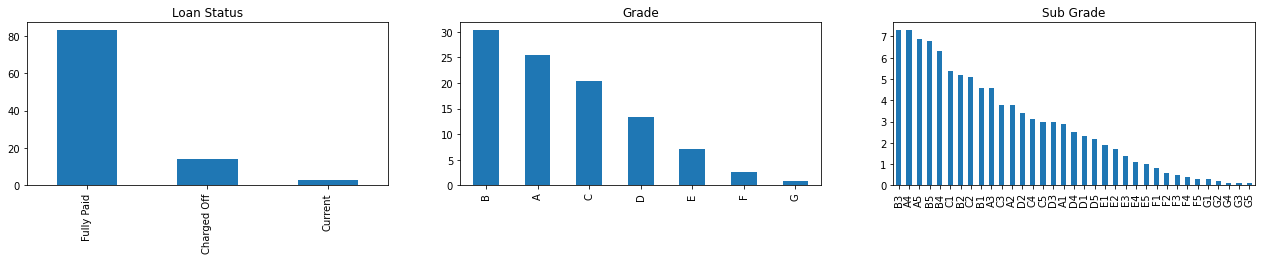

In [8]:
plt.figure(1)
n=131
d={'loan_status': 'Loan Status','grade':'Grade','sub_grade': 'Sub Grade'}
for col, title_name in d.items():
    plt.subplot(n)
    d2[col].value_counts(normalize=True).mul(100).round(1).plot.bar(figsize=(22,3), title=title_name)
    n=n+1

1. Although most of the customers have fully paid their respective loans, there is a significant percentage of people(~20%) who Charged off their loan

2. Customers with top grade ratings take significant number of loans.We need to understand how they behave with respect to Default status

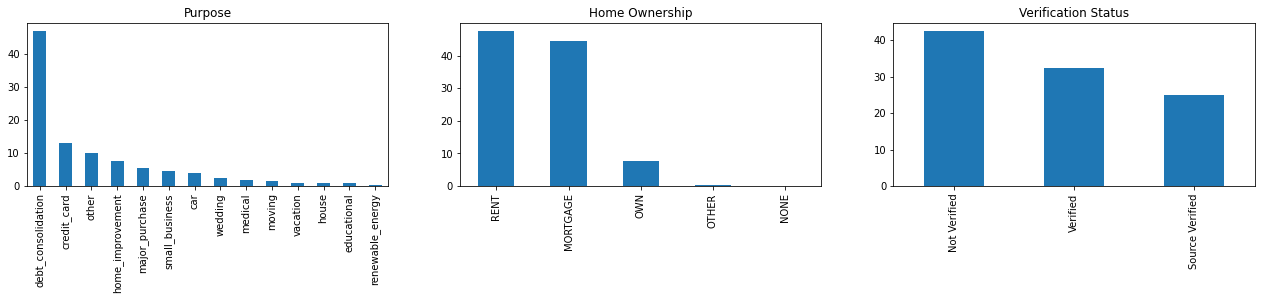

In [9]:
plt.figure(2)
n=131
d={'purpose':'Purpose','home_ownership': 'Home Ownership', 'verification_status': 'Verification Status'}
for col, title_name in d.items():
    plt.subplot(n)
    d2[col].value_counts(normalize=True).mul(100).round(1).plot.bar(figsize=(22,3), title=title_name)
    n=n+1

3. Customers with Home Ownership as "Rented" and "Mortgage" are the potential loan Applicant Customers and majority of the customers took loan for their "Debt Consolidation" or "Credit Card" purposes

<AxesSubplot:title={'center':'addr_state'}>

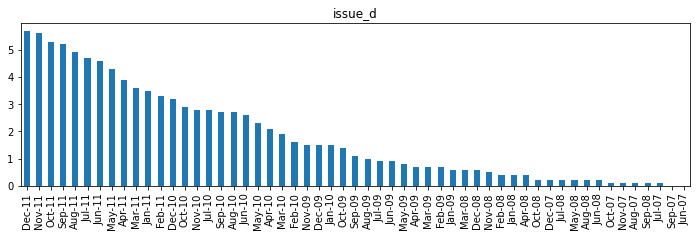

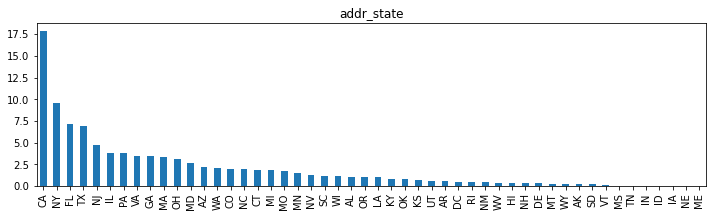

In [10]:
plt.figure(6)
d2['issue_d'].value_counts(normalize=True).mul(100).round(1).plot.bar(figsize=(12,3), title='issue_d')
plt.figure(7)
d2['addr_state'].value_counts(normalize=True).mul(100).round(1).plot.bar(figsize=(12,3), title='addr_state')

4. Over the years the number of customers taking loans is increasing which indicates an increasing Customer Base
5. A significant portion of loans are taken by Customers from states like California, NewYork, Florida and Texas.Implies there is a greater scope for the company to expand its customer base in less money lending states where we have less defaulters.

### 3.2 Numerical Data

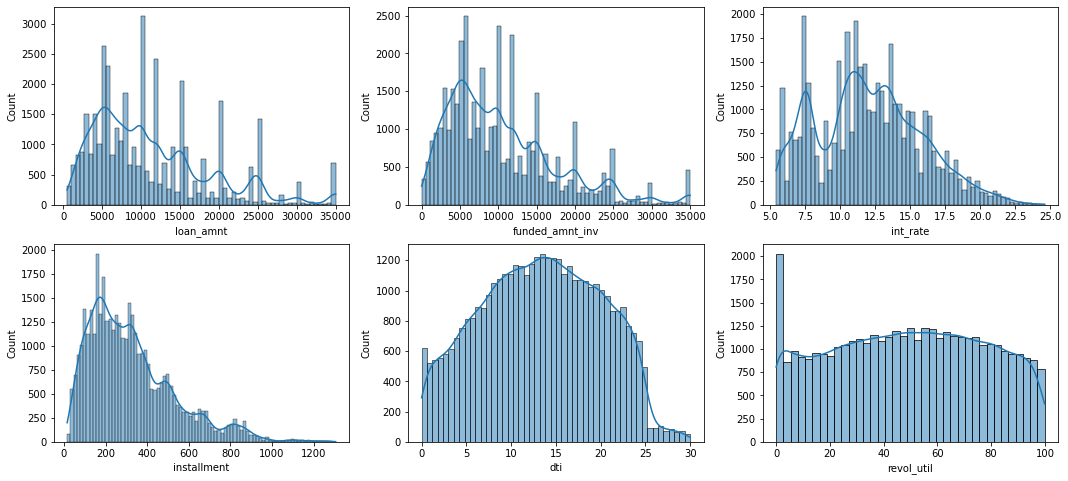

In [11]:
import seaborn as sns

fig, my_grid = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
l=[['loan_amnt','funded_amnt_inv','int_rate'],['installment','dti','revol_util']]
for i in range(len(l)):
    for j in range(len(l[i])):
        sns.histplot(data=d2[l[i][j]], ax=my_grid[i][j], kde=True)

# 4. Bivariate Analysis

### 4.1 Numerical Data
Since we did not get enough insights from above graphs, lets continue our Analysis on Numerical Data first. We will convert Numerical data into Categorical by binning them. 
We are plotting graphs according to their Counts(in 1st row) and Percentages(in 2nd row) to get more information

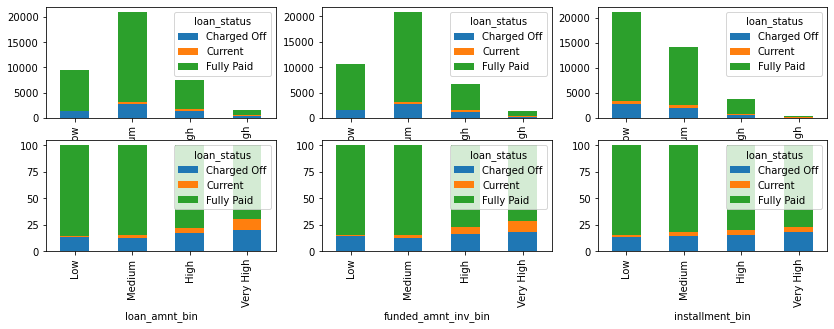

In [12]:
d={'loan_amnt':[0,5000,15000,25000,35000],'funded_amnt_inv': [0,5000,15000,25000,35000], 'installment': [0,300,600,900,1200]}

fig, my_grid = plt.subplots(2, 3, figsize=(14,4.5))
col_ind=0
for col, bins in d.items():
    d2[col+'_bin']=pd.cut(d2[col],bins, labels=['Low', 'Medium', 'High', "Very High"])
    ctb = pd.crosstab(d2[col+'_bin'], d2['loan_status'])
    
    ctb.plot(kind="bar", stacked=True, ax=my_grid[0][col_ind])
    ctb.div(ctb.sum(1),axis=0).astype(float).mul(100).plot(kind="bar", stacked=True, ax=my_grid[1][col_ind])
    col_ind=col_ind+1

6. Customers who are recieving loans with higher loan amount or funded amount[25000-35000 dollars] have a higher default rate. So we should be more precautious while lending money with higher amounts

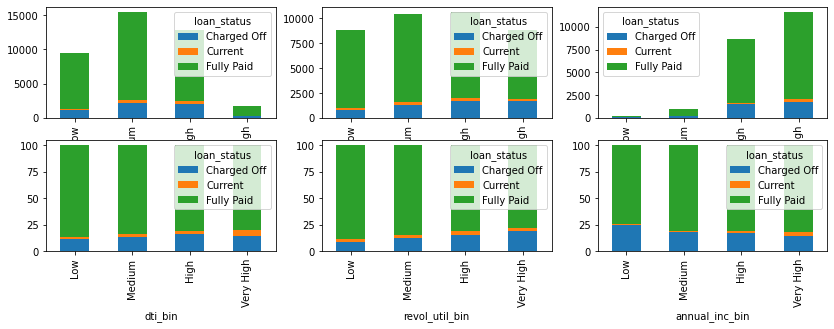

In [13]:
d={'dti':[0,8,16,24,30],'revol_util': [0,25,50,75,100], 'annual_inc': [4000,12000,20000,40000,60000]}

fig, my_grid = plt.subplots(2, 3, figsize=(14,4.5))
col_ind=0
for col, bins in d.items():
    d2[col+'_bin']=pd.cut(d2[col],bins, labels=['Low', 'Medium', 'High', "Very High"])
    ctb = pd.crosstab(d2[col+'_bin'], d2['loan_status'])
    
    ctb.plot(kind="bar", stacked=True, ax=my_grid[0][col_ind])
    ctb.div(ctb.sum(1),axis=0).astype(float).mul(100).plot(kind="bar", stacked=True, ax=my_grid[1][col_ind])
    col_ind=col_ind+1


7. Customers with low and medium annual incomes(<12000 dollars), have a high default rate.

### 4.2 Categorical Data

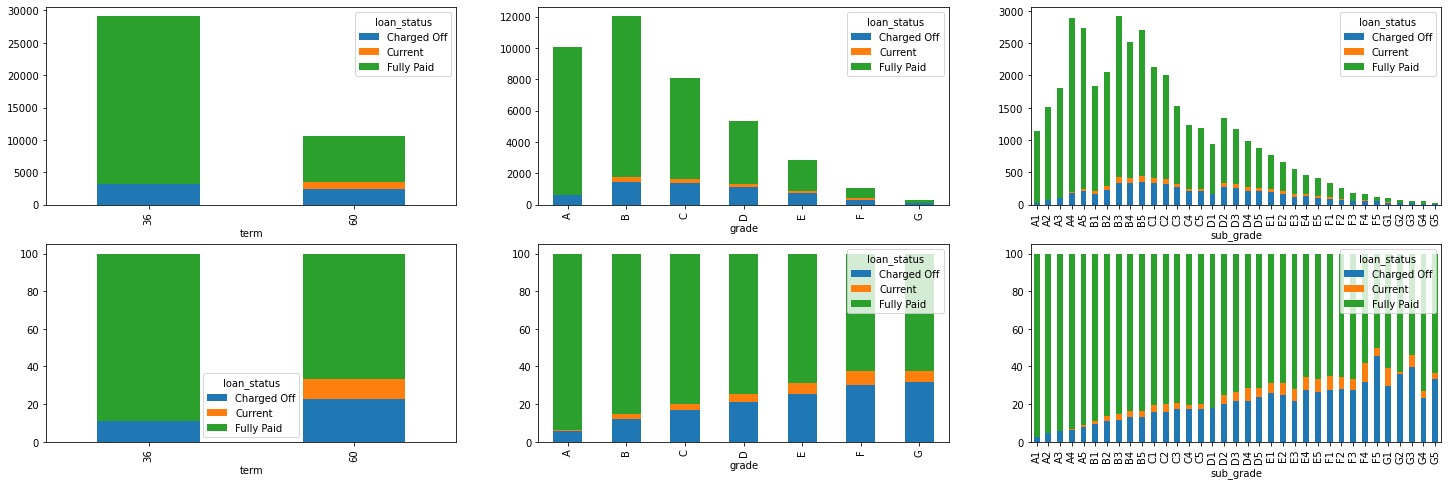

In [14]:
fig, my_grid = plt.subplots(nrows=2, ncols=3, figsize=(25,8))
l=['term','grade', 'sub_grade']
for index in range(len(l)):
    ctb = pd.crosstab(d2[l[index]], d2['loan_status'])
    ctb.plot(kind="bar", stacked=True, ax=my_grid[0][index])
    ctb.div(ctb.sum(1).astype(float),axis=0).mul(100).plot(kind="bar", stacked=True, ax=my_grid[1][index])

8. From the above "Term" graph, we can understand that people taking loans fro 60months time period tend to default more than with lower term period.
9. From the above observations, if the customer has lower subgrade(from B2-G5) with an annual income of <12000 dollars and loan amount >25000 dollars comes for a loan term of 60months, we need to be more cautious in lending the loan as the chances of defaulting is high under these constraints

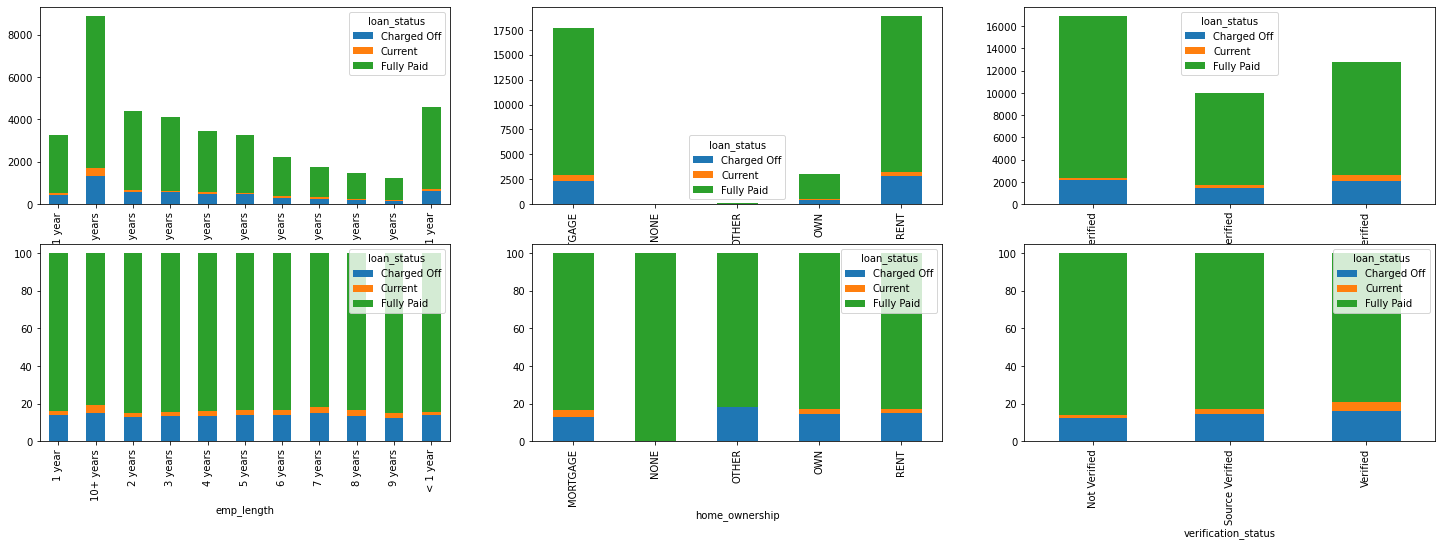

In [15]:
fig, my_grid = plt.subplots(nrows=2, ncols=3, figsize=(25,8))
l=['emp_length', 'home_ownership','verification_status']
for index in range(len(l)):
    ctb = pd.crosstab(d2[l[index]], d2['loan_status'])
    ctb.plot(kind="bar", stacked=True, ax=my_grid[0][index])
    ctb.div(ctb.sum(1).astype(float),axis=0).mul(100).plot(kind="bar", stacked=True, ax=my_grid[1][index])

10. We have observed that Customers with Home Ownership as Rent and Mortgage are the potential loan applicants, but however, from the above graph, there is not significant rise in default rate for these customers, so it is safe to target these customers to increase the customer base of the company

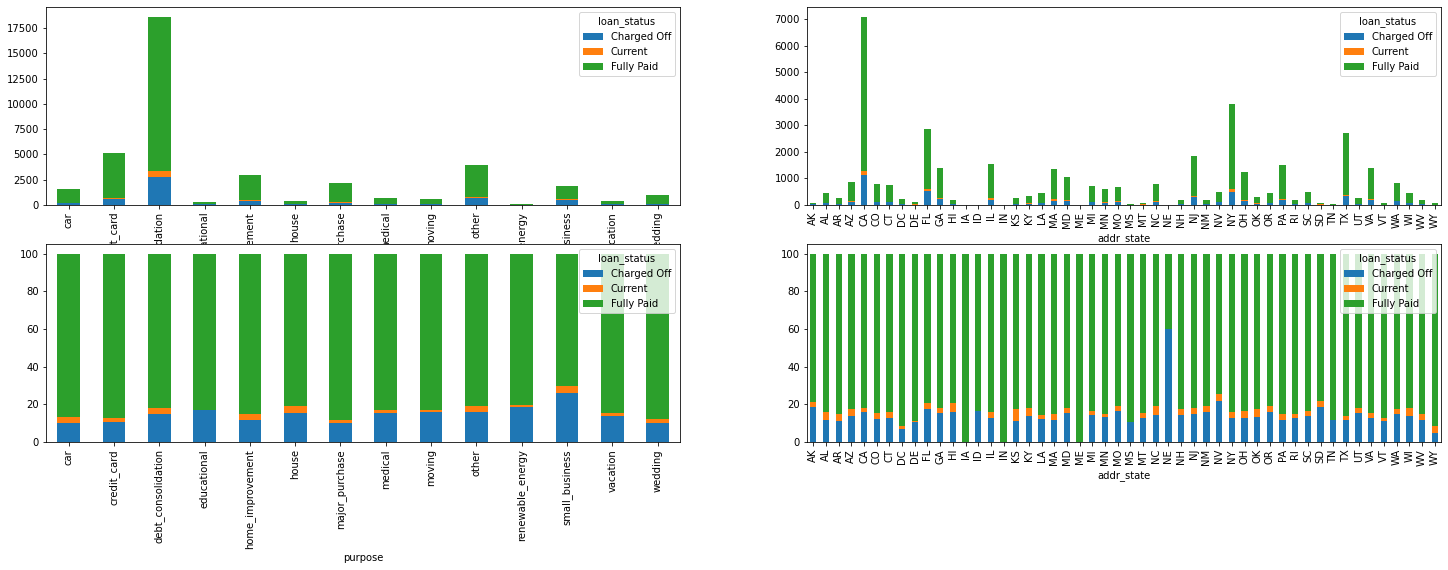

In [16]:
fig, my_grid = plt.subplots(nrows=2, ncols=2, figsize=(25,8))
l=['purpose', 'addr_state']
for index in range(len(l)):
    ctb = pd.crosstab(d2[l[index]], d2['loan_status'])
    ctb.plot(kind="bar", stacked=True, ax=my_grid[0][index])
    ctb.div(ctb.sum(1).astype(float),axis=0).mul(100).plot(kind="bar", stacked=True, ax=my_grid[1][index])

11. Customers taking loan for small business purposes have a high default rate to charge off. More Analysis need to be done and necesssary actions are to be taken to mitigate this
12. It is suggestible to stop lending loans(if not, be very cautious before lending) to the customers from the state of "NE" as 65% of the customers in this state have Charged off their loan. 

# 5. Multivariate Analysis

In [17]:
d3=d2.copy()
r_loan_status={'Charged Off': 0,'Fully Paid': 2, 'Current': 1}
d3["loan_status"]= [r_loan_status[item] for item in d3["loan_status"]]
d3["loan_status"].value_counts()

2    32950
0     5627
1     1140
Name: loan_status, dtype: int64

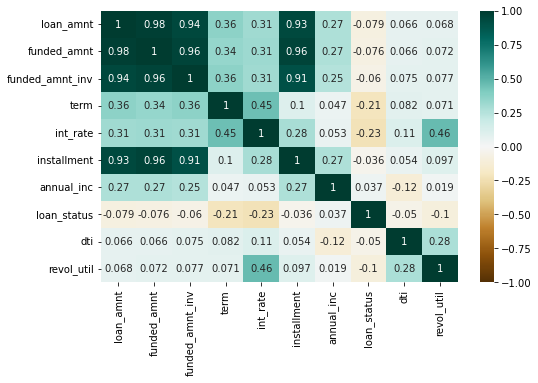

In [18]:

plt.figure(figsize=(8,5))
#mask = np.triu(np.ones_like(d3.corr()))
heatmap = sns.heatmap(d3.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

Not much information can be extracted from the correlation matrix w.r.to direct impact of numerical data on loan status

# 6. Segmented Analysis
We will consider the above insights and deep dive into special cases to get more insights where we need to take necessary actions

### To Avoid Loss

In [20]:
# To Analyze more on Customers from "NE" addr_state(have very high default rate)
d4=d2.copy()
d4 = d4[d4['addr_state'] == 'NE']
d4.groupby(['loan_status','purpose'])[['annual_inc','loan_amnt','int_rate','installment','dti','revol_util']].median()

annual_inc  loan_amnt  int_rate  installment  \
loan_status purpose                                                            
Charged Off debt_consolidation     36120.0    14400.0    12.800       483.81   
            home_improvement       53500.0     2500.0    11.220        82.13   
Fully Paid  debt_consolidation     52500.0     6150.0    11.915       204.48   

                                  dti  revol_util  
loan_status purpose                                
Charged Off debt_consolidation   8.47       93.50  
            home_improvement    20.00       19.45  
Fully Paid  debt_consolidation  16.47       75.10

In [30]:
# To Analyze more on Customers with Small Businesses as Purpose(have high default rate)
d4=d2.copy()
d4 = d4[d4['loan_status'] != 'Current']
d4 = d4[d4['purpose'] == 'small_business']
d4.groupby(['loan_status','home_ownership'])[['annual_inc','loan_amnt','int_rate','installment','dti','revol_util']].median()
# annual income <50k, Int_rate>13.5%, installments>300, dti>14

annual_inc  loan_amnt  int_rate  installment  \
loan_status home_ownership                                                 
Charged Off MORTGAGE           66000.0    15000.0    13.785      429.745   
            OTHER              78500.0    13500.0    15.825      458.550   
            OWN                56000.0    10500.0    14.110      308.410   
            RENT               50000.0    10000.0    14.265      295.855   
Fully Paid  MORTGAGE           76584.0    12437.5    12.150      353.410   
            OTHER              83500.0    13350.0    12.050      448.715   
            OWN                53400.0    10000.0    11.110      263.020   
            RENT               54000.0    10000.0    12.840      280.985   

                               dti  revol_util  
loan_status home_ownership                      
Charged Off MORTGAGE        11.385       43.05  
            OTHER           11.900       34.50  
            OWN             13.260       49.50  
            RENT            11.265       49.40  
Fully Paid  MORTGAGE        10.260       34.90  
            OTHER            6.100       25.40  
            OWN             11.620       25.80  
            RENT             9.740       32.90

In [38]:
d4=d2.copy()
d4 = d4[d4['grade'] != 'A']
d4 = d4[d4['annual_inc'] <= 12000]
d4 = d4[d4['loan_status'] != 'Current']
d4.groupby(['loan_status'])[['annual_inc','loan_amnt','int_rate','installment','dti','revol_util']].median()

,annual_inc,loan_amnt,int_rate,installment,dti,revol_util
loan_status,,,,,,
Charged Off,10800.0,2250.0,12.990,69.50,13.240,35.5
Fully Paid,10800.0,2400.0,12.455,70.14,8.185,31.0


### To increase profit margin

In [36]:
d4=d2.copy()
d4 = d4[d4['grade'] == 'A']
d4 = d4[d4['annual_inc'] >= 40000]
d4 = d4[d4['revol_util'] <= 25]
d4 = d4[d4['loan_status'] != 'Current']
d4.groupby(['loan_status','loan_amnt_bin'])[['annual_inc','loan_amnt','int_rate','installment','dti','revol_util']].median()

annual_inc  loan_amnt  int_rate  installment  \
loan_status loan_amnt_bin                                                 
Charged Off Low               54000.0     4000.0      7.51       121.75   
            Medium            60000.0    10000.0      7.66       288.85   
            High              64000.0    18000.0      7.51       567.22   
            Very High        121500.0    30000.0      7.50       927.22   
Fully Paid  Low               60000.0     4000.0      6.99       120.64   
            Medium            68000.0     9600.0      7.29       279.99   
            High              83500.0    18500.0      7.49       532.06   
            Very High        120000.0    30000.0      7.90       938.71   

                              dti  revol_util  
loan_status loan_amnt_bin                      
Charged Off Low            10.710       14.00  
            Medium          9.650       11.70  
            High           12.830       15.90  
            Very High       9.455        8.00  
Fully Paid  Low             8.865        9.60  
            Medium          8.920       10.90  
            High            9.765       12.90  
            Very High       7.135       10.05

# 7. Conclusions:

Over the years, although the customer base of loan applicants is increasing(which is a positive sign), the default rate(Charged off Customers) is at ~20% which is a significant number, because the total amount lended to these customers is Company's loss

#### To avoid Loss
1. The most immediate step we can take is to avoid lending loans to customers from "NE" state whose annual income is less that 36000 dollars and revol_util is high(>80%). The default rate for these customers is >65% i.e., 65 out of 100 customers are Charged off Customers.
2. For the customers taking loans for the purpose of "Small Business", We can either avoid customers with revol_util >35% or experiment by reducing the interest rates to slightly less than 13% so that the people trying to charge off could be able to payoff their loans due to reduced interest rates(when we do segmented analysis across any column, it is clear that customers who chargedoff have relatively high interest rates and high revol_utils)
3. Customers with low annual incomes(<12000 dollars) and low grading are to be offered less loan amount with slightly higher interest rates as these customers have high chances of defaulting the money.

#### To increase Profit Margins
1. For the 'A' Grade customers with high Annual income(>40000 dollars) and low revol_util(<25%), we can either offer them marginally more principal amount as per their requirement(profit i.e.,interest amount increases in proportion to principle amount) or slightly increase the interest rates(less suggestible, as chances of losing loyal customers is high)
2. For the longterm growth, We can expand our services to states like "IA", "ME" where we have very less customer base and almost zero default rate and target customers who have Home Ownsership as "Rent" or "Mortgage" as these are the potential customer base that we observed from our previous records
